In [1]:
import pyemu
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import flopy as fp
from flopy.utils.reference import SpatialReference
import os
import sys
from shutil import copyfile
import fileinput

sys.path.append("../../modules")
# hand made functions
from Rouss import *

flopy is installed in C:\Users\emmal\Anaconda3\envs\LS\lib\site-packages\flopy


In [2]:
ws = "workspace"
m_n_i = "pest_3d_r"
m_n = "pest_3D_R"

case = "3D_test"

In [3]:
sim = fp.mf6.MFSimulation.load(sim_ws=ws)
m = sim.get_model(m_n_i)

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package ic...
    loading package oc...
    loading package npf...
    loading package wel...
    loading package rch...
    loading package rch...
    loading package rch...
    loading package wel...
    loading package chd...
    loading package chd...
    loading package drn...
    loading package riv...
    loading package riv...
    loading package riv...
    loading package riv...
    loading package riv...
    loading package riv...
    loading package obs...
  loading ims package pest_3d_r...


In [4]:
sr = SpatialReference(delr=m.dis.delr.array, delc=m.dis.delc.array, xll=m.dis.xorigin.array, yll=m.dis.yorigin.array)
sr

xul:664525; yul:6207475; rotation:0; proj4_str:None; units:meters; lenuni:2; length_multiplier:1.0

In [5]:
# empty pst object
template_ws = "template"
pf = pyemu.utils.PstFrom(original_d=ws, new_d=template_ws,
                 remove_existing=True,
                 longnames=True, spatial_reference=sr,
                 zero_based=False)

2021-08-05 18:22:53.739225 starting: opening PstFrom.log for logging
2021-08-05 18:22:53.739225 starting PstFrom process
2021-08-05 18:22:53.740225 starting: setting up dirs
2021-08-05 18:22:53.740225 starting: removing existing new_d 'template'
2021-08-05 18:22:53.768250 finished: removing existing new_d 'template' took: 0:00:00.028025
2021-08-05 18:22:53.768250 starting: copying original_d 'workspace' to new_d 'template'
2021-08-05 18:22:53.855330 finished: copying original_d 'workspace' to new_d 'template' took: 0:00:00.087080
2021-08-05 18:22:53.856332 finished: setting up dirs took: 0:00:00.116107


In [6]:
#add observation
#Quat
df = pd.read_csv(os.path.join(template_ws,"heads_q.csv"),index_col=0)
hds_df = pf.add_observations("heads_q.csv",insfile="heads_q.csv.ins",index_cols="time",
                use_cols=list(df.columns.values),prefix="quat",obsgp=True)
#P
df = pd.read_csv(os.path.join(template_ws,"heads_pc.csv"),index_col=0)
hds_df = pf.add_observations("heads_pc.csv",insfile="heads_pc.csv.ins",index_cols="time",
                use_cols=list(df.columns.values),prefix="pc",obsgp=True)

#Q map
file = "heads_map_q.csv"
df = pd.read_csv(os.path.join(template_ws,file),index_col=0)
hds_df = pf.add_observations(file,insfile="{}.ins".format(file),index_cols="time",
                use_cols=list(df.columns.values),prefix="qmap",obsgp=True)

#P map
# file = "heads_map_p.csv"
# df = pd.read_csv(os.path.join(template_ws,file),index_col=0)
# hds_df = pf.add_observations(file,insfile="{}.ins".format(file),index_cols="time",
#                 use_cols=list(df.columns.values),prefix="Pmap",obsgp=True)

#pf.obs_dfs[2].weight = 0.5 # set a weaker weigth to these points

2021-08-05 18:22:53.880352 starting: adding observations from tabular output file
2021-08-05 18:22:53.880352 starting: reading list template\heads_q.csv
2021-08-05 18:22:53.884357 finished: reading list template\heads_q.csv took: 0:00:00.004005
2021-08-05 18:22:53.885357 starting: building insfile for tabular output file heads_q.csv
2021-08-05 18:22:53.895366 finished: building insfile for tabular output file heads_q.csv took: 0:00:00.010009
2021-08-05 18:22:53.896367 starting: adding observation from instruction file 'template\heads_q.csv.ins'
2021-08-05 18:22:53.908378 finished: adding observation from instruction file 'template\heads_q.csv.ins' took: 0:00:00.012011
2021-08-05 18:22:53.909379 finished: adding observations from tabular output file took: 0:00:00.029027
2021-08-05 18:22:53.918387 starting: adding observations from tabular output file
2021-08-05 18:22:53.918387 starting: reading list template\heads_pc.csv
2021-08-05 18:22:53.921391 finished: reading list template\heads_p

In [7]:
#P map
file = "heads_map_p.csv"
df = pd.read_csv(os.path.join(template_ws,file),index_col=0)
hds_df = pf.add_observations(file,insfile="{}.ins".format(file),index_cols="time",
                use_cols=list(df.columns.values),prefix="pmap",obsgp=True)

2021-08-05 18:22:54.007470 starting: adding observations from tabular output file
2021-08-05 18:22:54.007470 starting: reading list template\heads_map_p.csv
2021-08-05 18:22:54.017477 finished: reading list template\heads_map_p.csv took: 0:00:00.010007
2021-08-05 18:22:54.017477 starting: building insfile for tabular output file heads_map_p.csv
2021-08-05 18:22:54.026487 finished: building insfile for tabular output file heads_map_p.csv took: 0:00:00.009010
2021-08-05 18:22:54.026487 starting: adding observation from instruction file 'template\heads_map_p.csv.ins'
2021-08-05 18:22:54.043502 finished: adding observation from instruction file 'template\heads_map_p.csv.ins' took: 0:00:00.017015
2021-08-05 18:22:54.044503 finished: adding observations from tabular output file took: 0:00:00.037033


In [8]:
def chInsfle(file):
    
    """
    change a ins file create with PstFrom (only for a model with 1 stress period)
    in the right format to be used by PEST
    """
    
    fileout = "tmp"
    with open(file) as f:
        with open(fileout,"w") as fout:
            for i,line in enumerate(f):
                if i < 2:
                    fout.write(line)
                if i > 1:
                    for o,split in enumerate(line.split("w")):
                        if o == 1:
                            fout.write("~,~")
                        fout.write(split)
                        
    from shutil import copyfile
    copyfile(fileout, file) # copy 
    os.remove(fileout) # delete tmp file

chInsfle("template/heads_pc.csv.ins")
chInsfle("template/heads_q.csv.ins")
chInsfle("template/heads_map_q.csv.ins")
chInsfle("template/heads_map_p.csv.ins")

pf.obs_dfs[0].obgnme = "Quat"
pf.obs_dfs[1].obgnme = "Pc"
pf.obs_dfs[2].obgnme = "Qmap"
pf.obs_dfs[3].obgnme = "Pmap"

In [9]:
pf.build_pst("{}.pst".format(case))

noptmax:30, npar_adj:0, nnz_obs:522


### Parameters

C:\Users\emmal\Anaconda3\envs\LS\lib\site-packages\pyemu\utils\geostats.py:248: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


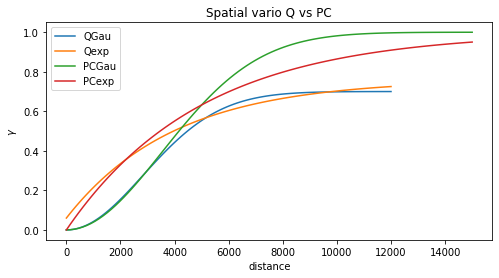

In [10]:
fig,ax = plt.subplots(figsize=(8,4))

#q
vq1 = pyemu.geostats.GauVario(a=4000,contribution=0.7)
vq2 = pyemu.geostats.ExpVario(a=4000,contribution=0.7)
grid_q1 = pyemu.geostats.GeoStruct(variograms=vq1, transform='log')
grid_q2 = pyemu.geostats.GeoStruct(variograms=vq2,nugget=0.06 , transform='log')
b=grid_q1.plot()
b=grid_q2.plot()

#pc
vp1 = pyemu.geostats.GauVario(a=5000,contribution=1)
vp2 = pyemu.geostats.ExpVario(a=5000,contribution=1)
grid_pc1 = pyemu.geostats.GeoStruct(variograms=vp1, transform='log')
grid_pc2 = pyemu.geostats.GeoStruct(variograms=vp2, transform='log')
a=grid_pc1.plot()
a=grid_pc2.plot()

a.set_title("Spatial vario Q vs PC")
plt.legend(["QGau","Qexp","PCGau","PCexp"])

In [11]:
## pp quat
zq = m.dis.idomain.array[1] # zone array for pp
zq[:,140:]=0
zq[zq<0]=0
#plt.imshow(zq)
pf.add_parameters(filenames="kq.txt",par_type="pilotpoint",pp_space=8,zone_array=zq,
                   par_name_base="kp_q",pargp="pp_q",
                   upper_bound=3,lower_bound=0.005,ult_ubound=6e-3,ult_lbound=1e-5,geostruct=grid_q1)

2021-08-05 18:22:54.513873 starting: adding pilotpoint type multiplier style parameters for file(s) ['kq.txt']
2021-08-05 18:22:54.513873 starting: loading array template\kq.txt
2021-08-05 18:22:54.547904 finished: loading array template\kq.txt took: 0:00:00.034031
2021-08-05 18:22:54.547904 loaded array 'kq.txt' of shape (182, 183)
2021-08-05 18:22:54.578933 starting: writing array-based template file 'kp_q_inst0_pilotpoint.csv.tpl'
2021-08-05 18:22:54.578933 starting: setting up pilot point parameters
2021-08-05 18:22:54.578933 No spatial reference (containing cell spacing) passed.
2021-08-05 18:22:54.579933 OK - using spatial reference in parent object.
2021-08-05 18:22:54.809142 118 pilot point parameters created
2021-08-05 18:22:54.809142 pilot point 'pargp':kp_q_inst:0
2021-08-05 18:22:54.810142 finished: setting up pilot point parameters took: 0:00:00.231209
2021-08-05 18:22:54.826157 starting: calculating factors for pargp=kp_q_inst:0
2021-08-05 18:22:54.826157 saving krige var

In [12]:
## pp pc
zpc = m.dis.idomain.array[3] # zone array for pp
zpc[:,140:]=0
zpc[zpc<0]=0
#plt.imshow(zpc)

pf.add_parameters(filenames="kpc.txt",par_type="pilotpoint",pp_space=8,zone_array=zpc,
                   par_name_base="kp_pc",pargp="pp_pc",
                   upper_bound=50,lower_bound=0.05,ult_ubound=5e-4,ult_lbound=5e-7,geostruct=grid_pc1)

2021-08-05 18:23:18.649897 starting: adding pilotpoint type multiplier style parameters for file(s) ['kpc.txt']
2021-08-05 18:23:18.650897 starting: loading array template\kpc.txt
2021-08-05 18:23:18.684928 finished: loading array template\kpc.txt took: 0:00:00.034031
2021-08-05 18:23:18.684928 loaded array 'kpc.txt' of shape (182, 183)
2021-08-05 18:23:18.717958 starting: writing array-based template file 'kp_pc_inst0_pilotpoint.csv.tpl'
2021-08-05 18:23:18.717958 starting: setting up pilot point parameters
2021-08-05 18:23:18.718959 No spatial reference (containing cell spacing) passed.
2021-08-05 18:23:18.718959 OK - using spatial reference in parent object.
2021-08-05 18:23:19.009223 162 pilot point parameters created
2021-08-05 18:23:19.010225 pilot point 'pargp':kp_pc_inst:0
2021-08-05 18:23:19.010225 finished: setting up pilot point parameters took: 0:00:00.292267
2021-08-05 18:23:19.031243 starting: calculating factors for pargp=kp_pc_inst:0
2021-08-05 18:23:19.032244 saving kr

2021-08-05 18:23:43.516680 starting: adding zone type multiplier style parameters for file(s) ['irr.txt']
2021-08-05 18:23:43.516680 starting: loading array template\irr.txt
2021-08-05 18:23:43.542704 finished: loading array template\irr.txt took: 0:00:00.026024
2021-08-05 18:23:43.542704 loaded array 'irr.txt' of shape (182, 183)
2021-08-05 18:23:43.566725 starting: writing array-based template file 'irr_inst0_zone.csv.tpl'
2021-08-05 18:23:43.566725 starting: writing template file irr_inst0_zone.csv.tpl for ['irr_inst:0']
2021-08-05 18:23:43.630783 finished: writing template file irr_inst0_zone.csv.tpl for ['irr_inst:0'] took: 0:00:00.064058
2021-08-05 18:23:43.631785 finished: writing array-based template file 'irr_inst0_zone.csv.tpl' took: 0:00:00.065060
2021-08-05 18:23:43.641793 finished: adding zone type multiplier style parameters for file(s) ['irr.txt'] took: 0:00:00.125113


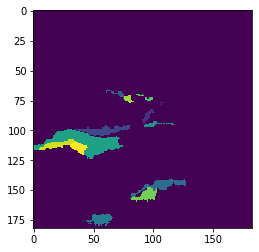

In [13]:
#irri
zi = np.loadtxt(os.path.join(ws,"zone_irr.txt"))
plt.imshow(zi)
pf.add_parameters(filenames="irr.txt",par_type="zone",zone_array=zi,
                   par_name_base="irr",pargp="irr",
                   upper_bound=2,lower_bound=0.8)

In [14]:
# kpms and kep
pf.add_parameters(filenames="kep.txt",par_type="constant",
                    par_name_base="ep",pargp="ep",
                    upper_bound=30,lower_bound=0.1)
pf.add_parameters(filenames="kpms.txt",par_type="constant",
                 par_name_base="pms",pargp="pms",upper_bound=30,lower_bound=0.05)

pf.add_parameters(filenames="kqm.txt",par_type="constant",
                 par_name_base="qm",pargp="qm",upper_bound=10,lower_bound=0.01)

2021-08-05 18:23:43.727873 starting: adding constant type multiplier style parameters for file(s) ['kep.txt']
2021-08-05 18:23:43.727873 starting: loading array template\kep.txt
2021-08-05 18:23:43.760902 finished: loading array template\kep.txt took: 0:00:00.033029
2021-08-05 18:23:43.760902 loaded array 'kep.txt' of shape (182, 183)
2021-08-05 18:23:43.793932 starting: writing array-based template file 'ep_inst0_constant.csv.tpl'
2021-08-05 18:23:43.793932 starting: writing template file ep_inst0_constant.csv.tpl for ['ep_inst:0']
2021-08-05 18:23:43.925051 finished: writing template file ep_inst0_constant.csv.tpl for ['ep_inst:0'] took: 0:00:00.131119
2021-08-05 18:23:43.926054 finished: writing array-based template file 'ep_inst0_constant.csv.tpl' took: 0:00:00.132122
2021-08-05 18:23:43.960083 finished: adding constant type multiplier style parameters for file(s) ['kep.txt'] took: 0:00:00.232210
2021-08-05 18:23:43.960083 starting: adding constant type multiplier style parameters 

### rivers

In [15]:
rivers = [riv for riv in os.listdir(template_ws) if riv.endswith("riv")]

In [16]:
def riv_tpl(rivers,tmp_ws):
    for riv in rivers:
        riv_file = os.path.join(tmp_ws,riv)
        tpl_file = riv_file+".tpl"
        copyfile(riv_file, tpl_file)
        
        with fileinput.FileInput(tpl_file, inplace=True) as file:
            for line in file:
                print(line.replace("    0.00500000   ", "~    c_{}     ~".format(riv.split(".")[0])), end='')
        with open(tpl_file, 'r+') as f:
            content = f.read()
            line = "ptf ~"
            f.seek(0, 0)
            f.write(line.rstrip('\r\n') + "\n" + content)
        
        #add parameter to control file
        dic = {"parnme":"c_{}".format(riv.split(".")[0]),
              "parval1": 0.005,
               "pargp": "cond",
               "tpl_filename": tpl_file,
               'input_filename':riv_file,
               "partype" : "constant",
               "partrans" : "log",
               "parubnd" : 0.1,
               "parlbnd" : 0.0001,
               "parchglim" : "factor",
               "scale" : 1.0,
               "dercom" : 1,
               "offset" : 0.0} 
        a = pd.DataFrame(dic,index=["c_{}".format(riv.split(".")[0])])
        pf.par_dfs[0] = pf.par_dfs[0].append(a,sort=False)
        
        pf.tpl_filenames.append(riv+".tpl")
        pf.input_filenames.append(riv)

In [17]:
riv_tpl(rivers,template_ws)

In [18]:
pf.build_pst("{}.pst".format(case))

noptmax:30, npar_adj:303, nnz_obs:522


C:\Users\emmal\Anaconda3\envs\LS\lib\site-packages\pyemu\utils\pst_from.py:539: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  par_data = pd.concat(self.par_dfs).loc[:, par_data_cols]
C:\Users\emmal\Anaconda3\envs\LS\lib\site-packages\pyemu\utils\pst_from.py:138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  pr = pd.concat(self._parfile_relations, ignore_index=True)


In [19]:
# add run model command
pf.mod_sys_cmds.append("..\..\..\exe\mf6")
pst = pf.build_pst("{}.pst".format(case))

noptmax:30, npar_adj:303, nnz_obs:522
2021-08-05 18:23:45.025315 forward_run line:pyemu.os_utils.run(r'..\..\..\exe\mf6')



2021-08-05 18:23:45.051342 starting: building prior covariance matrix
2021-08-05 18:23:45.110277 saving prior covariance matrix to file template\3D_test.prior.cov
2021-08-05 18:23:45.165327 finished: building prior covariance matrix took: 0:00:00.113985


C:\Users\emmal\Anaconda3\envs\LS\lib\site-packages\pyemu\utils\helpers.py:275: UserWarning: geostatistical_prior_builder() warning: geostruct sill != 1.0, user beware!
  "geostatistical_prior_builder() warning: geostruct sill != 1.0, user beware!"


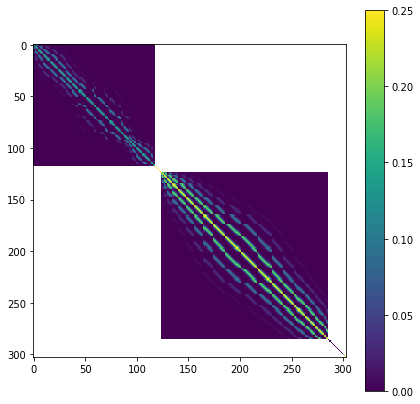

In [20]:
cov = pf.build_prior()
x = cov.x.copy()
x[x==0.0] = np.NaN
fig,ax = plt.subplots(1,1,figsize=(7,7))
g = ax.imshow(x)
plt.colorbar(g)

### Tikhonov

In [38]:
# I  will add a zero order thikonov (preferred value) and initial values needs to be appropriate
# I extract reference k from the 2D model already manually calibrated with minimize and calculate the ratio with the inversion k (setup in the setup_flopy notebook)
# Each pp will have an initial value

### quat
ref_k = np.loadtxt("../../Modeles3D/test_3D/working/kq.txt")
inv_k = np.loadtxt("workspace/kq.txt")

mask = (pst.parameter_data[pst.parameter_data["pargp"]=="kp_q_inst:0"].i.values.astype(int),
  pst.parameter_data[pst.parameter_data["pargp"]=="kp_q_inst:0"].j.values.astype(int))
parval = (ref_k/inv_k)[mask] 

pst.parameter_data.loc[pst.parameter_data["pargp"]=="kp_q_inst:0","parval1"] = parval

### plio
ref_k = np.loadtxt("../../Modeles3D/test_3D/working/kpc.txt")
inv_k = np.loadtxt("workspace/kpc.txt")

mask = (pst.parameter_data[pst.parameter_data["pargp"]=="kp_pc_inst:0"].i.values.astype(int),
  pst.parameter_data[pst.parameter_data["pargp"]=="kp_pc_inst:0"].j.values.astype(int))
parval = (ref_k/inv_k)[mask] 

pst.parameter_data.loc[pst.parameter_data["pargp"]=="kp_pc_inst:0","parval1"] = parval

#setup zero order tikho (preferred value regularization)
pyemu.helpers.zero_order_tikhonov(pst)

pst.prior_information.loc[:,"weight"] *= 10

In [45]:
mask = pst.observation_data["obgnme"] == "Pmap"
pst.observation_data.loc[mask,"weight"] *=2

mask = pst.observation_data["obgnme"] == "Qmap"
pst.observation_data.loc[mask,"weight"] *=2

In [51]:
pst.control_data.noptmax = -1 # FOR JACOBIAN
pst.write(os.path.join(template_ws,"{}.pst".format(case)))

noptmax:-1, npar_adj:303, nnz_obs:522


In [49]:
pst.prior_information[pst.prior_information.obgnme== 'regulcond']

,pilbl,equation,obgnme,weight,names
pilbl,,,,,
c_agly,c_agly,1.0 * log(c_agly) = -2.301030E+00,regulcond,3.333333,[c_agly]


In [50]:
#pyemu.os_utils.run("..\..\pestpp-glm.exe {}".format(case),cwd="template")

In [52]:
m_d = "master_glm"
pyemu.os_utils.start_workers(template_ws,"../../pestpp-glm.exe","{}.pst".format(case),num_workers=14,worker_root=".",master_dir=m_d)

In [67]:
t_d ="master_glm"
case = "3D_test"
pst = pyemu.Pst(os.path.join(t_d,"{}.pst".format(case)))
pst.write_par_summary_table(filename="none")

#pst.svd_data.eigthresh = 5e-7
pst.control_data.noptmax = 9 # number of iterations (should be set to a great value (50))
pst.control_data.nphistp = 9
pst.pestpp_options = {}
pst.pestpp_options["n_iter_base"] = -1
pst.pestpp_options["n_iter_super"] = 3
pst.pestpp_options["glm_num_reals"] = 50 # how many draws
pst.pestpp_options["parcov"] = "{}.prior.cov".format(case)
pst.pestpp_options["base_jacobian"] = "{}.jcb".format(case)
pst.write(os.path.join(t_d,"{}.pst".format(case)))



noptmax:9, npar_adj:303, nnz_obs:522


In [68]:
# DO the inversion
m_d = "master_glm_run"
pyemu.os_utils.start_workers(t_d,"../../pestpp-glm.exe","{}.pst".format(case),num_workers=14,worker_root=".",
                             master_dir=m_d)

In [62]:
pst.reg_data.phimaccept

1.05e-10

In [64]:
pst.reg_data.